In [43]:
import pandas as pd
import pickle
import autosklearn.classification
import sklearn
import numpy as np

In [18]:
df = pd.read_csv('prediction_win_df.csv')
df = df.drop("Unnamed: 0", axis=1)
df = df.dropna()
df["win"] = df["win"].astype(str)
df.head()

,win,team1_season_ewa_dr,team1_season_ewa_drp,team1_season_ewa_efgp,team1_season_ewa_ftar,team1_season_ewa_fta,team1_season_ewa_ftp,team1_season_ewa_ora,team1_season_ewa_orp,team1_season_ewa_or,...,team2_multi_ewa_ora,team2_multi_ewa_orp,team2_multi_ewa_or,team2_multi_ewa_pf,team2_multi_ewa_s,team2_multi_ewa_tpfgp,team2_multi_ewa_to,team2_multi_wp,team2_multi_ewa_pace,team2_multi_ewa_pts_poss
0,0,122.100000,67.700000,0.405000,0.508000,32.000000,0.750000,97.400000,23.100000,9.000000,...,103.105998,33.102685,9.934537,19.087462,5.569729,0.347000,13.877457,0.524555,67.460891,1.050593
1,0,122.263636,63.354545,0.404091,0.533818,30.909091,0.718545,93.690909,24.172727,9.000000,...,101.184388,32.218441,10.656173,17.635309,5.590649,0.337285,13.402110,0.574671,70.568820,1.019790
2,0,118.215702,61.944628,0.404620,0.436760,25.289256,0.692810,88.601653,21.650413,7.909091,...,104.329525,31.740012,10.198623,16.797075,6.938052,0.348160,12.800703,0.541960,69.837419,1.049187
3,0,123.103757,65.227423,0.383234,0.397713,22.873028,0.718299,82.983171,21.150338,7.743802,...,100.811114,27.940992,9.228727,18.660845,7.167371,0.350218,12.608072,0.536933,68.935049,1.020888
4,0,104.524597,70.208558,0.426560,0.456076,24.116031,0.716216,90.678085,29.395489,9.425418,...,102.898012,28.539312,8.627695,18.027290,5.780920,0.338874,12.011256,0.716357,67.522658,1.038833


In [21]:
X_train = df.drop("win", axis=1)
y_train = df[["win"]]

In [22]:
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
#predictions = cls.predict(X_test)

AutoSklearnClassifier(per_run_time_limit=360)

In [24]:
y_hat = cls.predict(X_train)
print("Accuracy score", sklearn.metrics.accuracy_score(y_train, y_hat))

Accuracy score 0.7762386324106744


In [42]:
y_hat

array(['0', '0', '0', ..., '1', '1', '0'], dtype=object)

In [39]:
np.argmax(cls.cv_results_['mean_test_score'])

31

In [44]:
x = cls.show_models()
results = cls # the classifier/regressor itself
pickle.dump(results, open('ncaab-model-1.pickle','wb'))

In [46]:
# load model
with open('ncaab-model-1.pickle', 'rb') as f:
    loaded_classifier = pickle.load(f)

In [47]:
y_pred = loaded_classifier.predict(X_train)

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

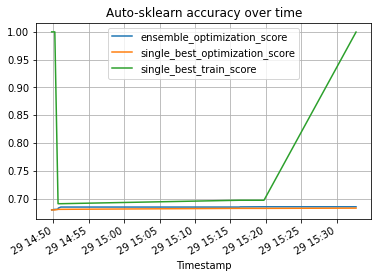

In [36]:
cls.performance_over_time_.plot(
   x='Timestamp',
   kind='line',
   legend=True,
   title='Auto-sklearn accuracy over time',
   grid=True,
)

In [37]:
cls.show_models()

"[(0.340000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'sgd', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'random_trees_embedding', 'classifier:sgd:alpha': 0.087074193523704, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'log', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.022478481790713076, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:random_trees_embedding:bootstrap': 'False', 'feature_preprocessor:random_trees_embedding:max_depth': 